**Install mtcnn for Face Detection**

In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 4.6MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from numpy import * 
import pandas as pd 

Load the model & summarize Input and Output shape.

In [ ]:
model = load_model('/content/drive/MyDrive/facenet_keras.h5')      

print(model.inputs)                                                
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


get_embedding() function will return the 128 bit embeddings.

In [ ]:
def get_embedding(model, face_pixels):               
    # scale pixel values
    face_pixels = face_pixels.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    # transform face into one sample
    samples = expand_dims(face_pixels, axis=0)
    # make prediction to get embedding
    yhat = model.predict(samples)
    return yhat[0]

extract_face() function will return the detected cropped face.

In [ ]:
def extract_face(filename, required_size=(160, 160)): 
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

Exract the faces from Original & test Images.

In [ ]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()

Saving so3.jpg to so3.jpg


Saving so4.png to so4.png


Saving so1.jpg to so1.jpg


Saving so2.jpg to so2.jpg


In [ ]:
originalface = extract_face('/content/so3.jpg')
testface     = extract_face('/content/so4.png')

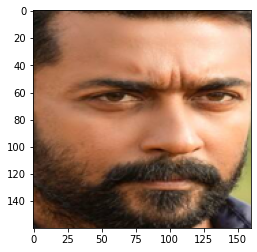

In [ ]:
plt.imshow(originalface)   #cropped face of original image

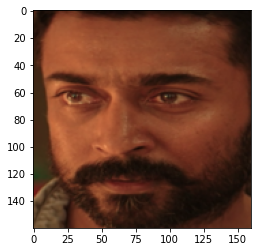

In [ ]:
plt.imshow(testface)  #cropped face of test image

Forward propagation to predict embeddings.

In [ ]:
originalembedding = get_embedding(model,originalface)    
testembedding = get_embedding(model,testface)

print(originalembedding)

print(testembedding)

[ 1.1383399  -1.0214247  -0.38830766  1.870182    0.31866148 -1.3074759
 -1.7378483   0.02100649  0.65575427  0.8624122   0.67724067 -0.43332627
  1.0601152  -0.97002745  0.21855015 -0.02668595  2.4416046   0.26810795
  0.19568133  1.3026702  -0.40074047  0.334964    1.7548991   1.1374468
 -0.14884822 -0.72086185  0.04351597  0.31044462  1.2325865  -1.2581542
 -0.31266278 -1.2076992  -0.19796532 -0.88734627  0.3201616   1.221258
 -0.7269387   0.90148073 -0.02382697 -0.762238   -0.69386065  0.06347027
  1.0430852   0.89154786  0.48001465  0.05648436 -0.40340745  0.09843329
  1.45352     1.6792257   2.1977496  -0.8213765  -0.69922113 -0.7689694
  1.7690299  -0.73150045 -0.2250617   0.74705017 -0.5373991  -0.56756634
 -1.4606773  -1.5424291   1.0195512  -1.272009   -0.12489467  1.3217301
 -0.81552184 -0.84681773 -1.5349557   0.5355645  -0.9485316  -0.8673501
 -0.6052702  -0.21684635 -0.65548193 -0.40621343 -2.0481975  -0.38346744
 -0.45495895 -0.21111295 -0.27891433  1.0769863   2.799923 

Calculate the Euclidean Distance

In [ ]:
dist = linalg.norm(testembedding-originalembedding)

In [ ]:
print(dist)

8.018393


"\nEuclidean Distance between the two embeddings of same person's is relatively small & Big for differnt person's.\n\nBy this idea we can verify that the given images are of same person or different.\n\nthis is called the one shot learning, which means we don't have to train model for every one.\n"

'''
Euclidean Distance between the two embeddings of same person's is relatively small & Big for differnt person's.

By this idea we can verify that the given images are of same person or different.

this is called the one shot learning, which means we don't have to train model for every one.
'''

**DESCRIPTION**
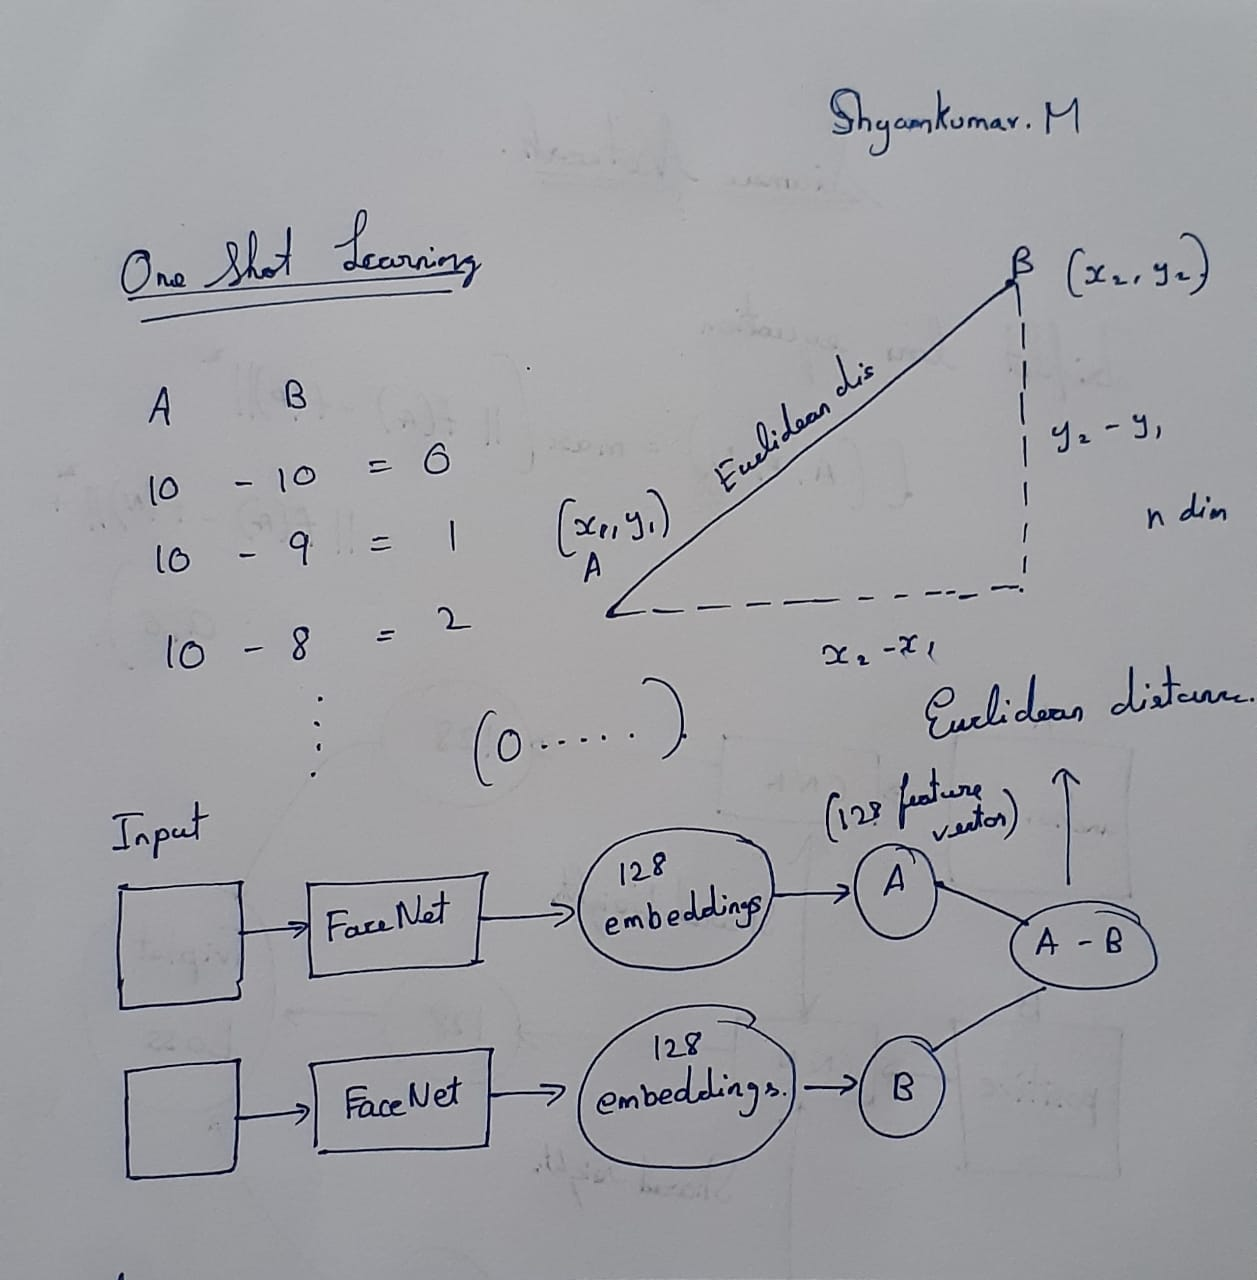
